In [1]:
# pip install scipy

In [2]:
import numpy as np
# 산술평균
data = [10, 20, 30, 40, 50]
mean_value = np.mean(data)
print(mean_value)  # 30.0

30.0


In [3]:
# 기하평균 
from scipy.stats import hmean, gmean
gmean(data)

np.float64(26.051710846973528)

In [4]:
#조홮 평균
hmean(data)

np.float64(21.8978102189781)

In [5]:
# 가중평균 (weighted mean)
# 5천원짜리 상품 8개와 9천원짜리 상품 2개를 구입했을 때 평균 구매값은
(5000 * 8 + 9000 * 2) / (8 + 2)

# 가격, 개수 
prices = [5000, 9000]
counts = [8, 2]

np.average(prices, weights=counts)

np.float64(5800.0)

In [6]:
# 대표값 - 중앙값 


In [7]:
data

[10, 20, 30, 40, 50]

In [8]:
import numpy as np
scores = [65,75,80,85,95]
p25 = np.percentile(scores, 25) #Q1
p50 = np.percentile(scores, 50) #median
p75 = np.percentile(scores, 75) #Q3

p25, p50, p75

(np.float64(75.0), np.float64(80.0), np.float64(85.0))

In [9]:
# IQR : Q3 - Q1
scores = [65,75,80,85,95]

중앙값, 분위수는 개수를 중요시하는 통계량 
이상값/극단적인 값이 중요하지 않다 

In [10]:
# 최빈값 
import pandas as pd

data = pd.Series([1, 2, 2, 3, 3, 3, 4, 4])
mode_value = data.mode()
print(mode_value)  # 3 (가장 많이 등장한 값)

0    3
dtype: int64


범위의 계산 > 변동성을 측정하는 일반
지표 > 극단적인 값에 민감 

- 최대/최소 2개의 값만 사용
- 개별점수들이 다른 정수들과 얼마나 차이가 있나 
- 실제 데이터가 어떤 값들로 구성되어있는지를 설명할 수 있다 

In [ ]:

data = [10, 20, 30, 40, 50]
range_value = max(data) - min(data)
print(range_value)  # 40

40


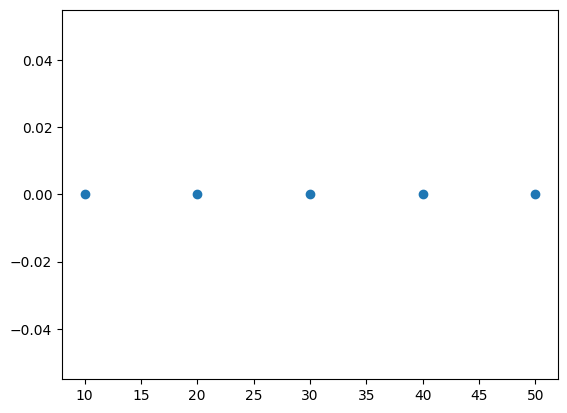

In [19]:
import matplotlib.pyplot as plt 
plt.scatter(data, np.zeros_like(data))

In [21]:
import seaborn as sns
vp_df = sns.load_dataset('iris')
vp_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
# sepal_legth의 범위
vp_df['sepal_length'].max() - vp_df['sepal_length'].min()

for col in vp_df.select_dtypes(include='number').columns:
     col_range = vp_df[col].max() - vp_df[col].min()
     print(f'{col} range: {col_range}')


sepal_length range: 3.6000000000000005
sepal_width range: 2.4000000000000004
petal_length range: 5.9
petal_width range: 2.4


변동성이 가장 큰 속성은 petal_length입니다.   
petal_length와 petal_width가 sepal_length와 
sepal_width 보다 상대적으로 변동성이 큽니다.

모델 생성시에 다루어야하는 속성으로 볼 수 있습니다. 

Text(0.5, 1.0, 'petal_length vs petal_width')

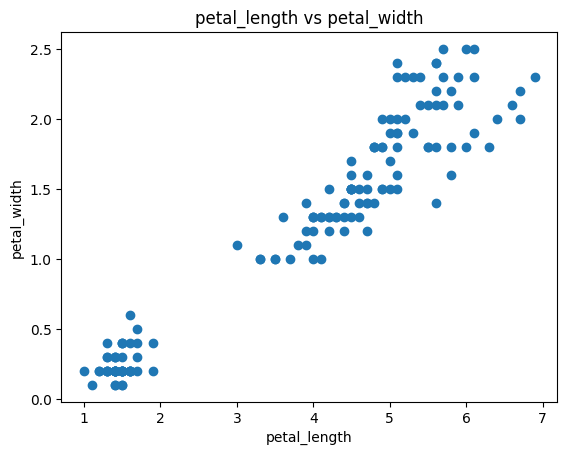

In [36]:
# petal_length와 petal_width
plt.scatter(vp_df['petal_length'], vp_df['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('petal_length vs petal_width')

Text(0.5, 1.0, 'sepal_length vs sepal_width')

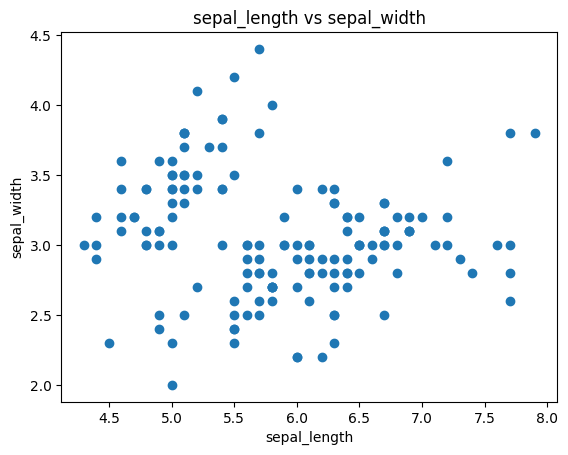

In [37]:
# sepal_length, sepal_width
plt.scatter(vp_df['sepal_length'], vp_df['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('sepal_length vs sepal_width')

산포도를 이용해 극단적인 다른 데이터(이상치)가 있는지를 확인해야 한다.

# 분산 variance 


In [ ]:
data = [10,20,30,40,50]
variance_value = np.var(data)
print(variance_value)
# 분산 값이 크면 평균과 각각의 값들이 멀리있다



200.0


In [ ]:
# std
import numpy as np

std_dev = np.std(data)
print(std_dev) 

14.142135623730951


In [44]:
# sd의 비교
import numpy as np
import matplotlib.pyplot as plt

# 평균과 표준편차 설정
mu = 100
sd1 = 10
sd2 = 50

# 정규분포 데이터 생성
data1 = np.random.normal(mu, sd1, 10000)
data2 = np.random.normal(mu, sd2, 10000)

(array([139., 191., 277., 315., 493., 549., 616., 751., 762., 812., 756.,
        732., 724., 579., 512., 469., 335., 225., 182., 124.,  87.,  50.,
         53.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230.]),
 <BarContainer object of 23 artists>)

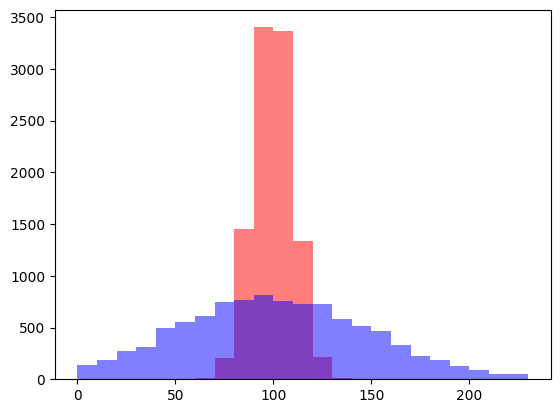

In [48]:
# histogram
bins = np.arange(0,240,10)
plt.hist(data1, bins=bins, color='red', alpha=0.5)
plt.hist(data2, bins=bins, color='blue', alpha=0.5)

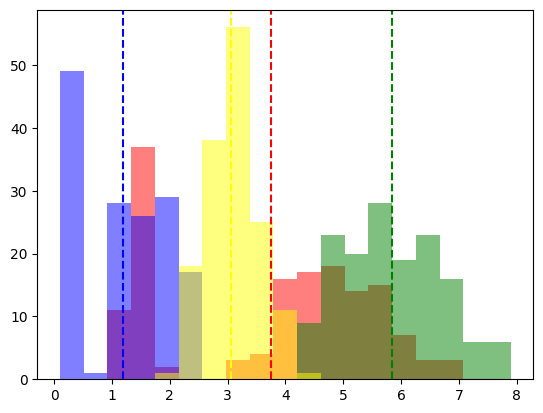

In [57]:
# iris dataset 표준편자 비교
# histogram
data1 = vp_df['petal_length']
data2 = vp_df['petal_width']
data3 = vp_df['sepal_length']
data4 = vp_df['sepal_width']
# 공통 x축 범위 설정
bins = np.linspace(
    min(data1.min(), data2.min(), data3.min(), data4.min()),
    max(data1.max(), data2.max(), data3.max(), data4.max()),
    20
)
plt.hist(vp_df['petal_length'], bins=bins, color='red', alpha=0.5, label='petal_length')
plt.hist(vp_df['petal_width'], bins=bins, color='blue', alpha=0.5, label='petal_width')
plt.hist(vp_df['sepal_length'], bins=bins, color='green', alpha=0.5, label='sepal_length')
plt.hist(vp_df['sepal_width'], bins=bins, color='yellow', alpha=0.5, label='sepal_width')

plt.axvline(vp_df['petal_length'].mean(), color='red', linestyle='--')
plt.axvline(vp_df['petal_width'].mean(), color='blue', linestyle='--')
plt.axvline(vp_df['sepal_length'].mean(), color='green', linestyle='--')
plt.axvline(vp_df['sepal_width'].mean(), color='yellow', linestyle='--')

In [59]:
numeric_df = vp_df.select_dtypes(include=['float64', 'int'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

summ = pd.DataFrame({'Q1' : Q1,
                     'Q3' : Q3,
                     'IQR' : IQR})
summ

,Q1,Q3,IQR
sepal_length,5.1,6.4,1.3
sepal_width,2.8,3.3,0.5
petal_length,1.6,5.1,3.5
petal_width,0.3,1.8,1.5


가장 분산이 큰 변수 : petal_length   
가장 분산이 작은 변수: sepal_width   
품종을 분류할 떄, petal_length가 민감하게 작용할 것이다.    
식별력이 크다.   
** IQR > 이상치의 허용범위가 크다    


# 분포의 모양, 형태

- 모양이 정규분포인지   
- 치우쳐져 있는가 / 좌/우, 위/아래
- 특이한 패턴이 있는가 / 쌍봉

In [62]:
import pandas as pd
import numpy as np

# 데이터 입력
data = [
    [47, 10, 31, 25, 20],
    [2, 11, 31, 25, 21],
    [44, 14, 15, 26, 21],
    [41, 14, 16, 26, 21],
    [7, 30, 17, 27, 24],
    [6, 30, 16, 29, 24],
    [35, 32, 15, 29, 23],
    [38, 33, 19, 28, 20],
    [35, 34, 18, 29, 21],
    [36, 32, 16, 27, 20],
]

# DataFrame으로 변환
df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D', 'E'])
df

,A,B,C,D,E
0,47,10,31,25,20
1,2,11,31,25,21
2,44,14,15,26,21
3,41,14,16,26,21
4,7,30,17,27,24
5,6,30,16,29,24
6,35,32,15,29,23
7,38,33,19,28,20
8,35,34,18,29,21
9,36,32,16,27,20


- 각 변수의 분포 형태 : 5개의 변수
- 값의 범위, 도수가 많은 구간 (count) 빈도 
- 이상치 유무 

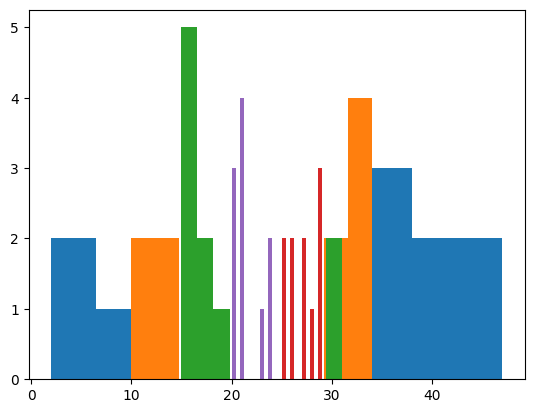

In [65]:
# 각 속성별로 히스토그램
for col in df.columns:
    plt.hist(df[col])

In [69]:
from scipy.stats import kurtosis
data1 = vp_df['petal_length']
data2 = vp_df['petal_width']
data3 = vp_df['sepal_length']
data4 = vp_df['sepal_width']

kurtosis_value1 = kurtosis(data1)
kurtosis_value2 = kurtosis(data2)
kurtosis_value3 = kurtosis(data3)
kurtosis_value4 = kurtosis(data4)

kurtosis_value1, kurtosis_value2,kurtosis_value3, kurtosis_value4

(np.float64(-1.3955358863990055),
 np.float64(-1.336067405231553),
 np.float64(-0.5735679489249765),
 np.float64(0.18097631752246768))

0: 정규 분포   
양수 첨도: 정규분포보다 그만큼 뾰족하다 > 꼬리가 두껍다 (길다)   
음수 첨도: 정규분포보다 그만큼 눌려있다 > 꼬리가 얇다 (짧다)   
:데이터가 평균 주변에 고르다 

In [ ]:
양의 정도 > 3, 정규분포보다 뾰족하고, 꼬리가 두꺼워서 극단적인 값이 더 많다

음의 정도 < 3, 정규분포보다 평평하고, 꼬리가 알아서 극단적인 값이 덜 발생한다 

In [ ]:
from scipy.stats import skew

data = [10, 20, 30, 40, 100]  # 오른쪽으로 치우친 데이터
skew_value = skew(data)
print(skew_value)  # 양수 (오른쪽 꼬리)

# negative - 불량률, 시험 점수 
# 보고서에 쓸 내용 없으면 기술 통계라도 쓰기 

1.1384199576606167
